In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df_bp = pd.read_excel("G:\\diploma\\X_bp.xlsx", index_col = 0, dtype = 'float64')
df_bp.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


In [3]:
df_nup = pd.read_excel("G:\\diploma\\X_nup.xlsx", index_col = 0, dtype = 'float64')
df_nup.head()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.0,4.0,57.0
1,0.0,4.0,60.0
2,0.0,4.0,70.0
3,0.0,5.0,47.0
4,0.0,5.0,57.0


Объедими данные в единый DataFrame по типу 'inner'

In [34]:
#объединение данных в единый dataframe по типу inner. Лишние строки отбрасываются автоматически
df = df_bp.merge(df_nup, how = 'inner', left_index = True, right_index = True)
#right_index = True - правая таблица (df_nup), использование индекса включено. Аналогично с левой таблицей.
#Благодаря этому объединение происходит по индексу

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки      

In [6]:
#посмотрим количество уникальных значений в датасете
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,1023.0,2.930366,0.913222,0.389403,2.317887,2.906878,3.552660,5.591742
"Плотность, кг/м3",1023.0,1975.734888,73.729231,1731.764635,1924.155467,1977.621657,2021.374375,2207.773481
"модуль упругости, ГПа",1023.0,739.923233,330.231581,2.436909,500.047452,739.664328,961.812526,1911.536477
"Количество отвердителя, м.%",1023.0,110.570769,28.295911,17.740275,92.443497,110.564840,129.730366,198.953207
"Содержание эпоксидных групп,%_2",1023.0,22.244390,2.406301,14.254985,20.608034,22.230744,23.961934,33.000000
"Температура вспышки, С_2",1023.0,285.882151,40.943260,100.000000,259.066528,285.896812,313.002106,413.273418
"Поверхностная плотность, г/м2",1023.0,482.731833,281.314690,0.603740,266.816645,451.864365,693.225017,1399.542362
"Модуль упругости при растяжении, ГПа",1023.0,73.328571,3.118983,64.054061,71.245018,73.268805,75.356612,82.682051
"Прочность при растяжении, МПа",1023.0,2466.922843,485.628006,1036.856605,2135.850448,2459.524526,2767.193119,3848.436732
"Потребление смолы, г/м2",1023.0,218.423144,59.735931,33.803026,179.627520,219.198882,257.481724,414.590628


Описательная статистика содержит по каждому столбцу (по каждой переменной):
count - количество значений
mean - среднее значение
std - стандартное отклонение
min - минимум
25% - верхнее значение первого квартиля
50% - медиана
75% - верхнее значение третьего квартиля
max - максимум

In [8]:
#проверим наличие пропусков в данных
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [9]:
df.isna().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [10]:
#проверим наличие повторяющихся строк
df.duplicated().sum()

0

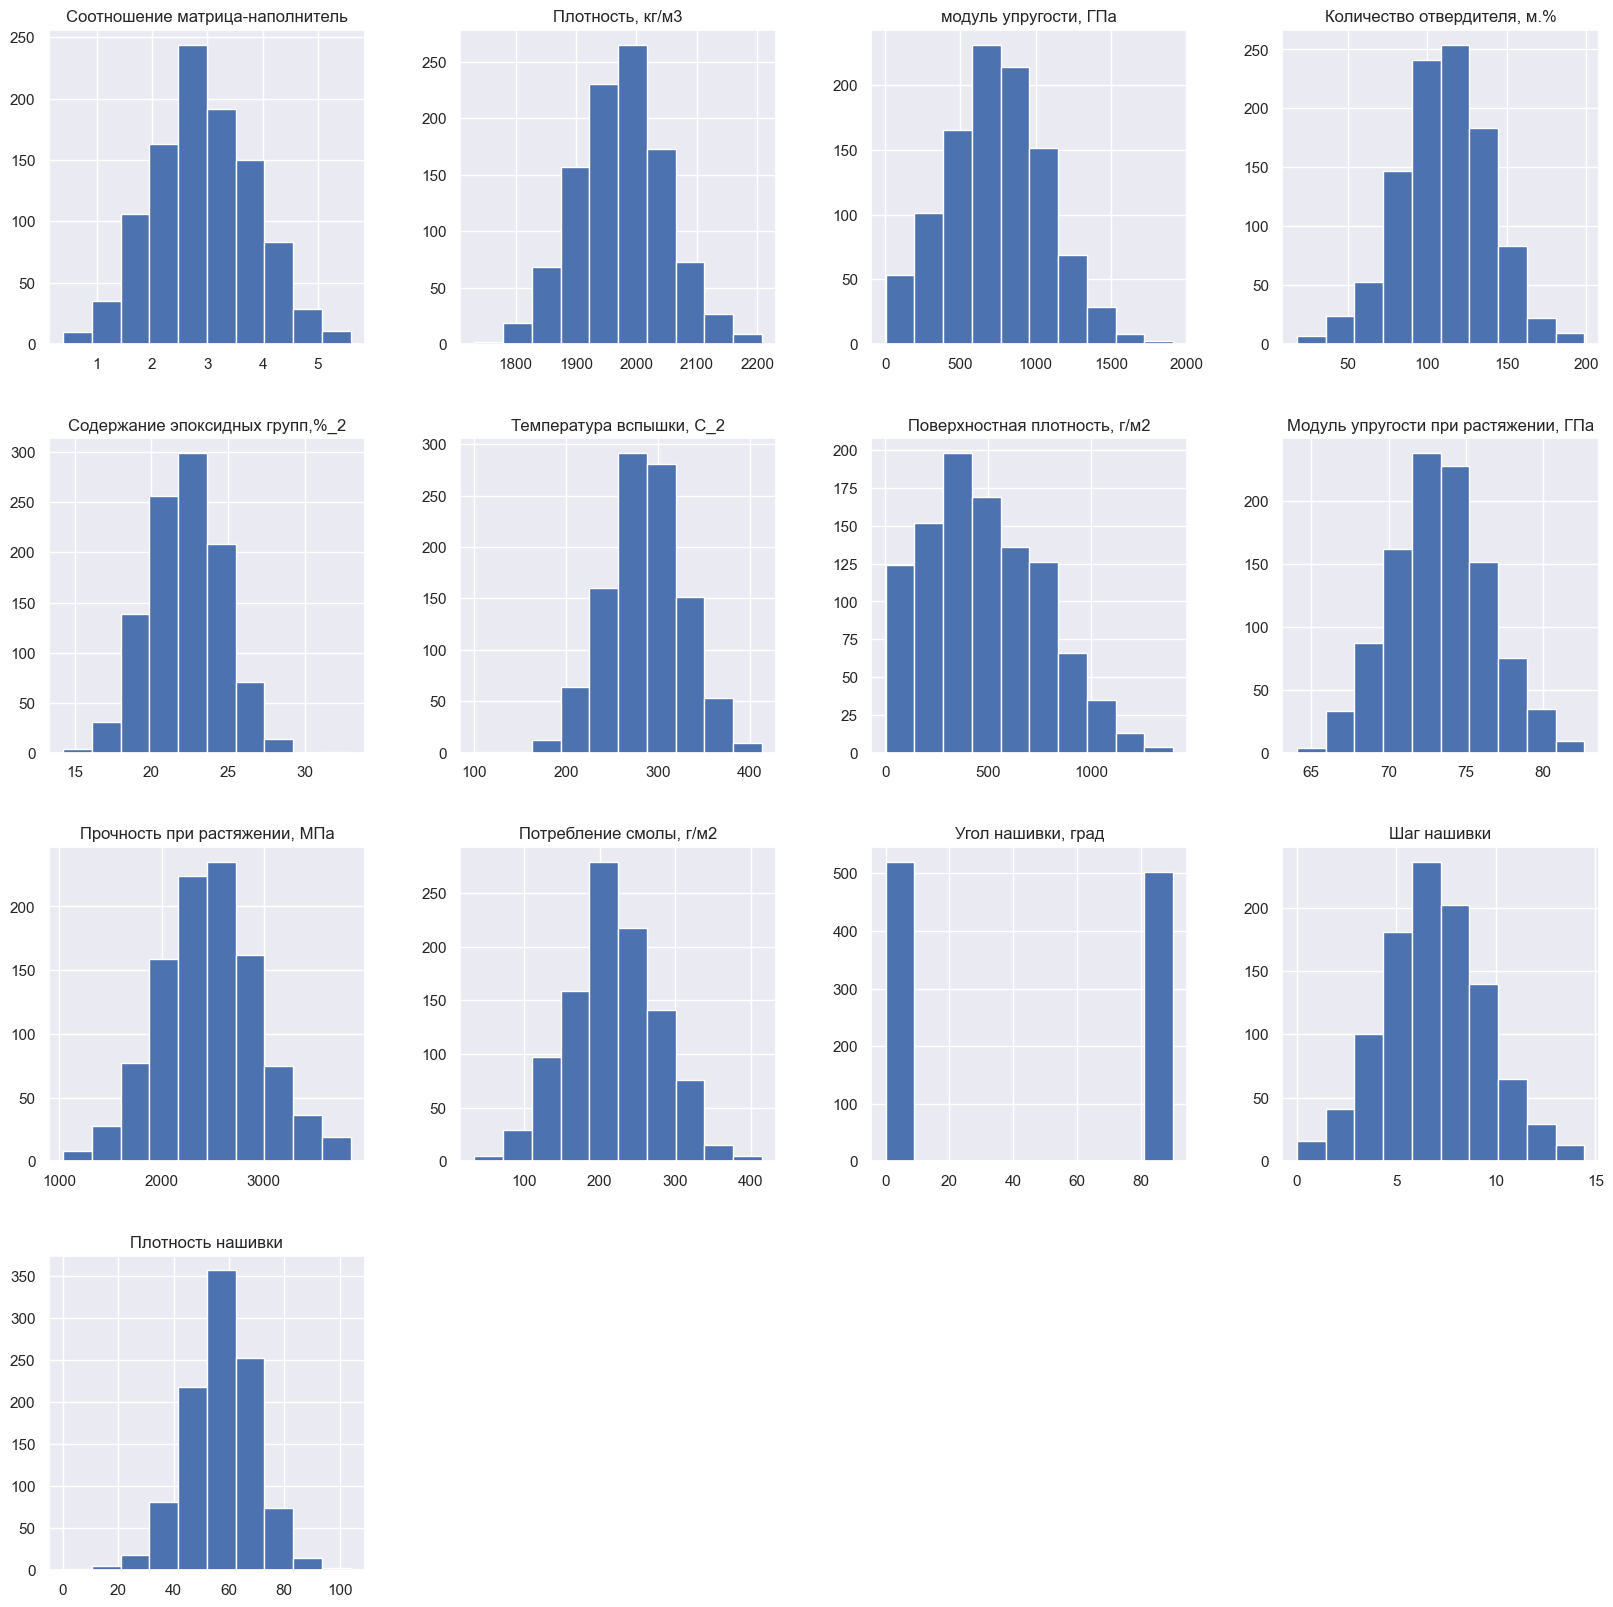

In [6]:
# Построим гистограммы распределения каждой из переменных
df.hist(figsize = (20,20))
plt.show()

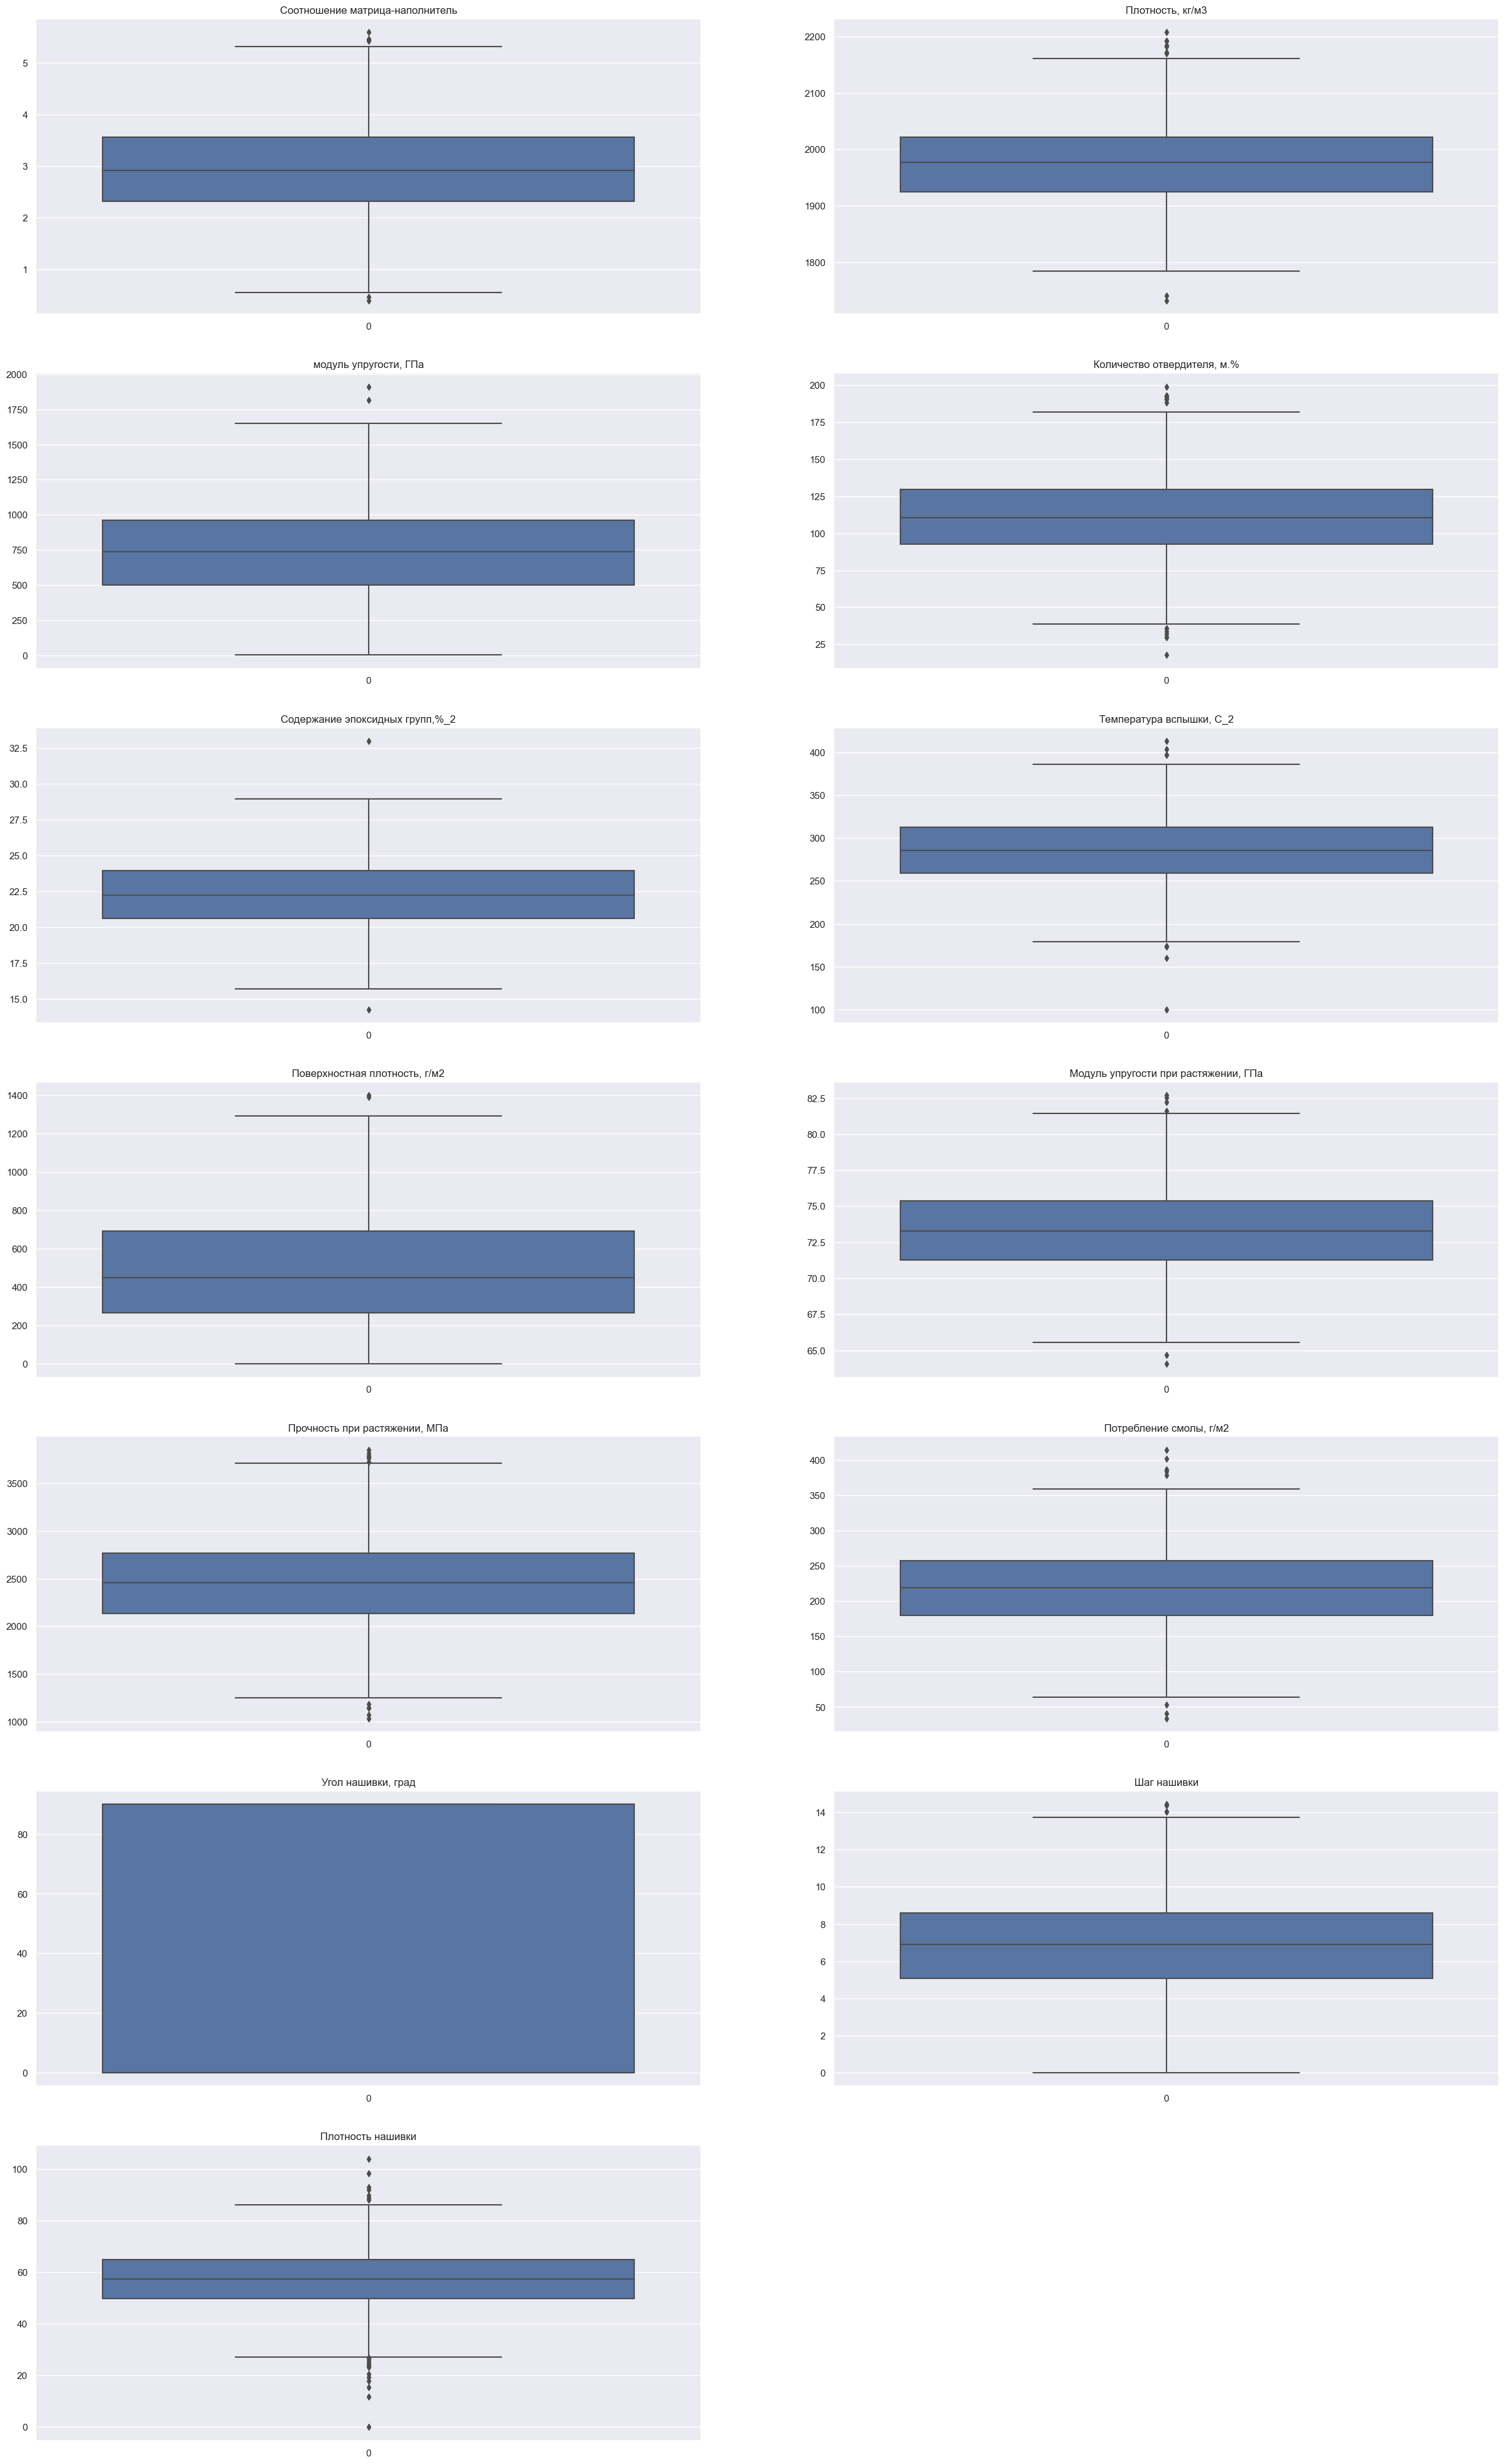

In [11]:
#Построим диаграмму размаха (ящик с усами)
plt.figure(figsize = (30,50))
nrows = 7
ncols = 2
counter = 1
for col in df.columns:
    plt.subplot(nrows, ncols, counter)
    sns.boxplot(data = df[col]).set_title(col)
    counter += 1

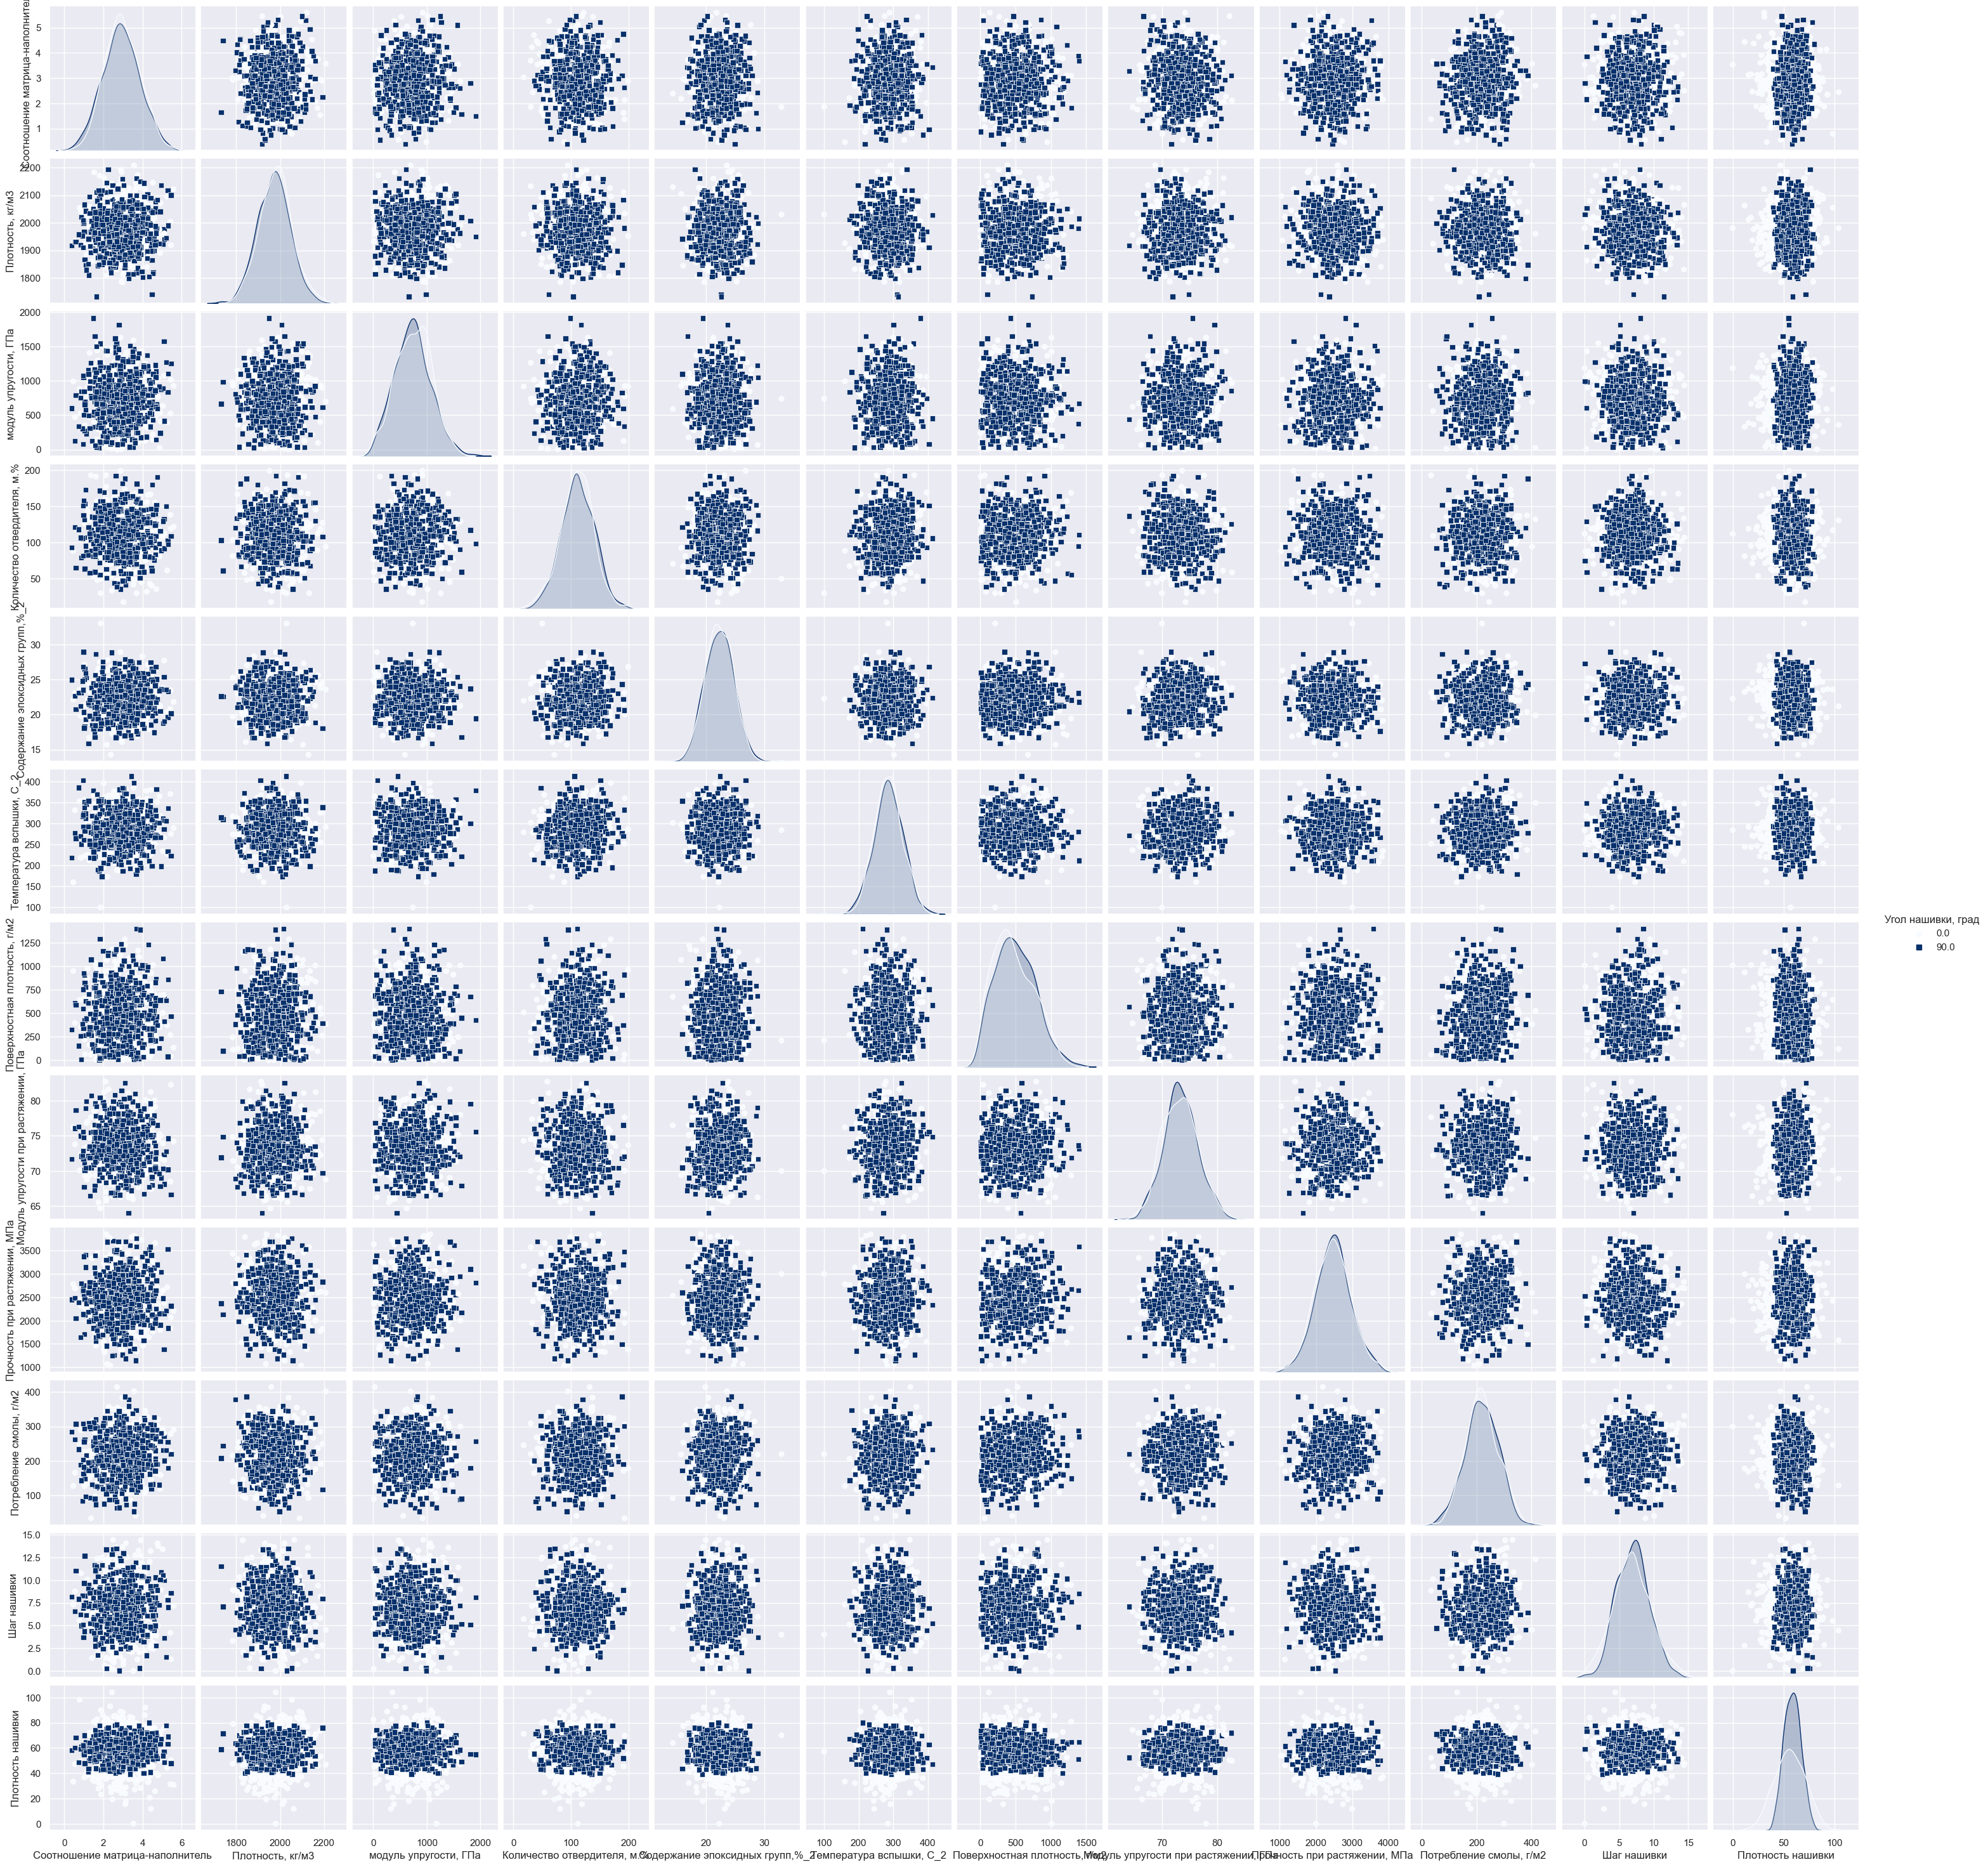

In [7]:
sns.pairplot(df, hue = 'Угол нашивки, град', diag_kind = 'auto', palette='Blues')

<Axes: >

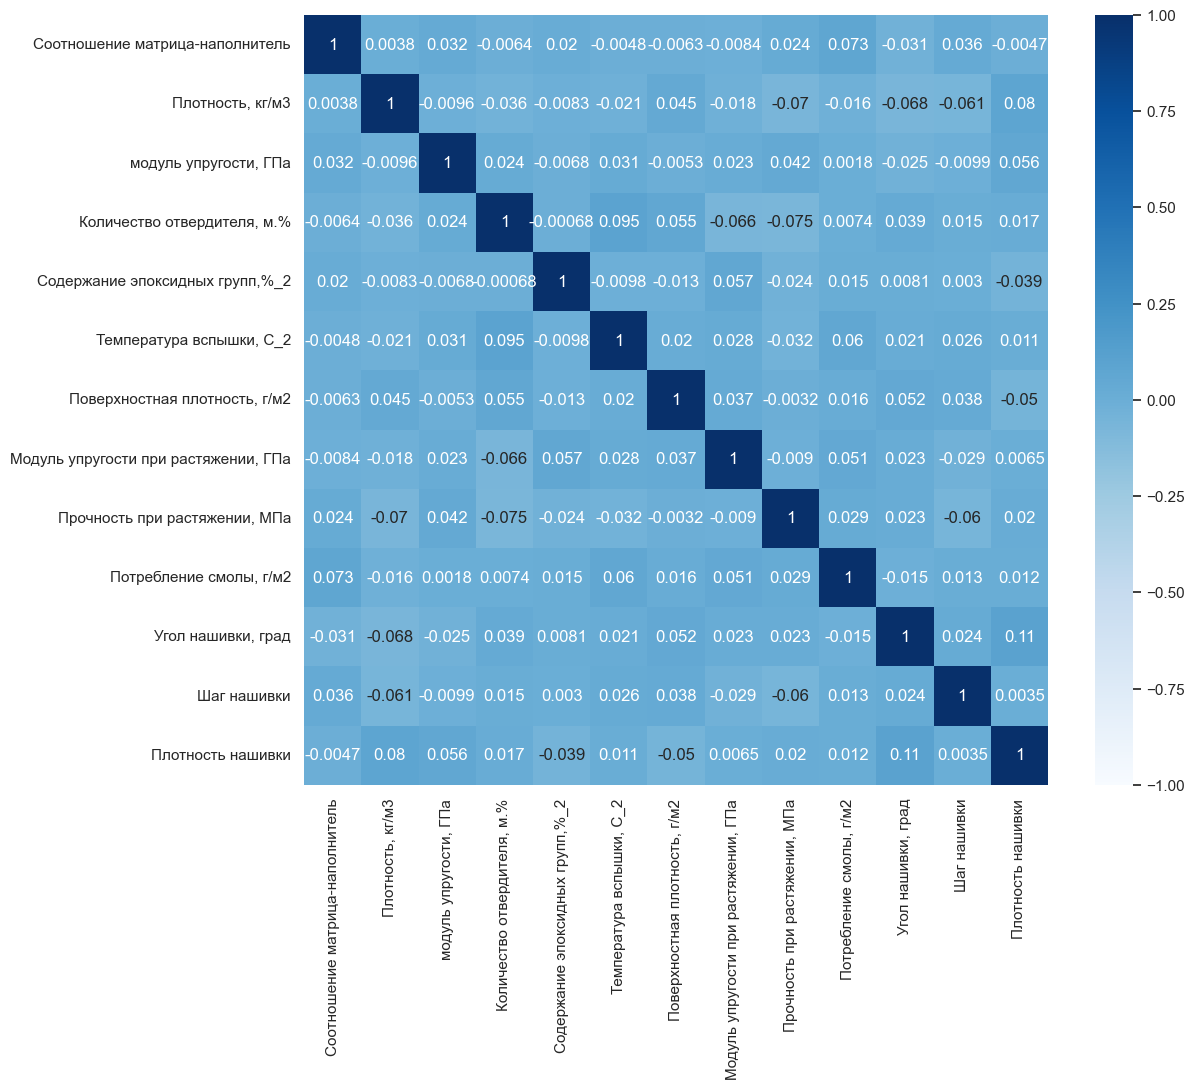

In [11]:
sns.set(rc = {'figure.figsize':(12,10)})
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'Blues')

In [17]:
a = df.corr()

In [20]:
a[a<1].max()

Соотношение матрица-наполнитель         0.072531
Плотность, кг/м3                        0.080304
модуль упругости, ГПа                   0.056346
Количество отвердителя, м.%             0.095193
Содержание эпоксидных групп,%_2         0.056828
Температура вспышки, С_2                0.095193
Поверхностная плотность, г/м2           0.055198
Модуль упругости при растяжении, ГПа    0.056828
Прочность при растяжении, МПа           0.041868
Потребление смолы, г/м2                 0.072531
Угол нашивки, град                      0.107947
Шаг нашивки                             0.038332
Плотность нашивки                       0.107947
dtype: float64

Удаление выбросов

In [35]:
#небольшой цикл для очистки от выбросов
counter = 0
def percentile(df=df):
    for column in df.columns:
        q75,q25 = np.percentile(df.loc[:,column],[75,25])
        intr_qr = q75-q25

        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)

        df.loc[df[column] < min,column] = np.nan #заменяем выбросы на значения Nan,чтобы легко подсчитать их и удалить
        df.loc[df[column] > max,column] = np.nan
    print(df.isnull().sum())
    return (df.isnull().sum().sum())
a = percentile(df)
while a != 0:
    counter += 1
    df = df.dropna()
    a = percentile(df)
print('Число итераций ', counter)

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64
Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   1
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    1
Прочность при растяжении, МПа           4
Потребление смолы, г/м2                 1
Угол наш

C:\Users\User\AppData\Local\Temp\ipykernel_6304\1133779273.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[column] < min,column] = np.nan #заменяем выбросы на значения Nan,чтобы легко подсчитать их и удалить
C:\Users\User\AppData\Local\Temp\ipykernel_6304\1133779273.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[column] > max,column] = np.nan


In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,922.0,2.927964,0.895472,0.547391,2.320191,2.907832,3.549367,5.314144
"Плотность, кг/м3",922.0,1974.118744,71.040648,1784.482245,1923.318006,1977.321002,2020.053266,2161.565216
"модуль упругости, ГПа",922.0,736.119982,327.607008,2.436909,498.538615,736.178435,956.955626,1628.000000
"Количество отвердителя, м.%",922.0,111.136066,26.753228,38.668500,92.856591,111.162090,130.109815,181.828448
"Содержание эпоксидных групп,%_2",922.0,22.200570,2.393926,15.695894,20.556328,22.177681,23.956980,28.955094
"Температура вспышки, С_2",922.0,286.181128,39.420764,179.374391,259.205321,286.220763,313.012786,386.067992
"Поверхностная плотность, г/м2",922.0,482.429070,280.437329,0.603740,264.345872,457.732246,695.531920,1291.340115
"Модуль упругости при растяжении, ГПа",922.0,73.303464,3.025864,65.793845,71.241213,73.247594,75.310130,81.203147
"Прочность при растяжении, МПа",922.0,2461.491315,453.564734,1250.392802,2148.175736,2455.974462,2751.233766,3654.434359
"Потребление смолы, г/м2",922.0,218.048059,57.137475,72.530873,179.875097,218.697660,256.623860,359.052220


In [37]:
df.to_csv('G:\\diploma\\data.csv')

Нормализация данных

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
mms = MinMaxScaler()
df_norm = pd.DataFrame(mms.fit_transform(df), columns=df.columns, index=df.index)

In [44]:
df_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,922.0,0.499412,0.187858,0.0,0.371909,0.495189,0.629774,1.0
"Плотность, кг/м3",922.0,0.502904,0.188395,0.0,0.368184,0.511396,0.624719,1.0
"модуль упругости, ГПа",922.0,0.451341,0.201534,0.0,0.305188,0.451377,0.587193,1.0
"Количество отвердителя, м.%",922.0,0.506200,0.186876,0.0,0.378514,0.506382,0.638735,1.0
"Содержание эпоксидных групп,%_2",922.0,0.490578,0.180548,0.0,0.366571,0.488852,0.623046,1.0
"Температура вспышки, С_2",922.0,0.516739,0.190721,0.0,0.386228,0.516931,0.646553,1.0
"Поверхностная плотность, г/м2",922.0,0.373295,0.217269,0.0,0.204335,0.354161,0.538397,1.0
"Модуль упругости при растяжении, ГПа",922.0,0.487343,0.196366,0.0,0.353512,0.483718,0.617568,1.0
"Прочность при растяжении, МПа",922.0,0.503776,0.188668,0.0,0.373447,0.501481,0.624299,1.0
"Потребление смолы, г/м2",922.0,0.507876,0.199418,0.0,0.374647,0.510143,0.642511,1.0


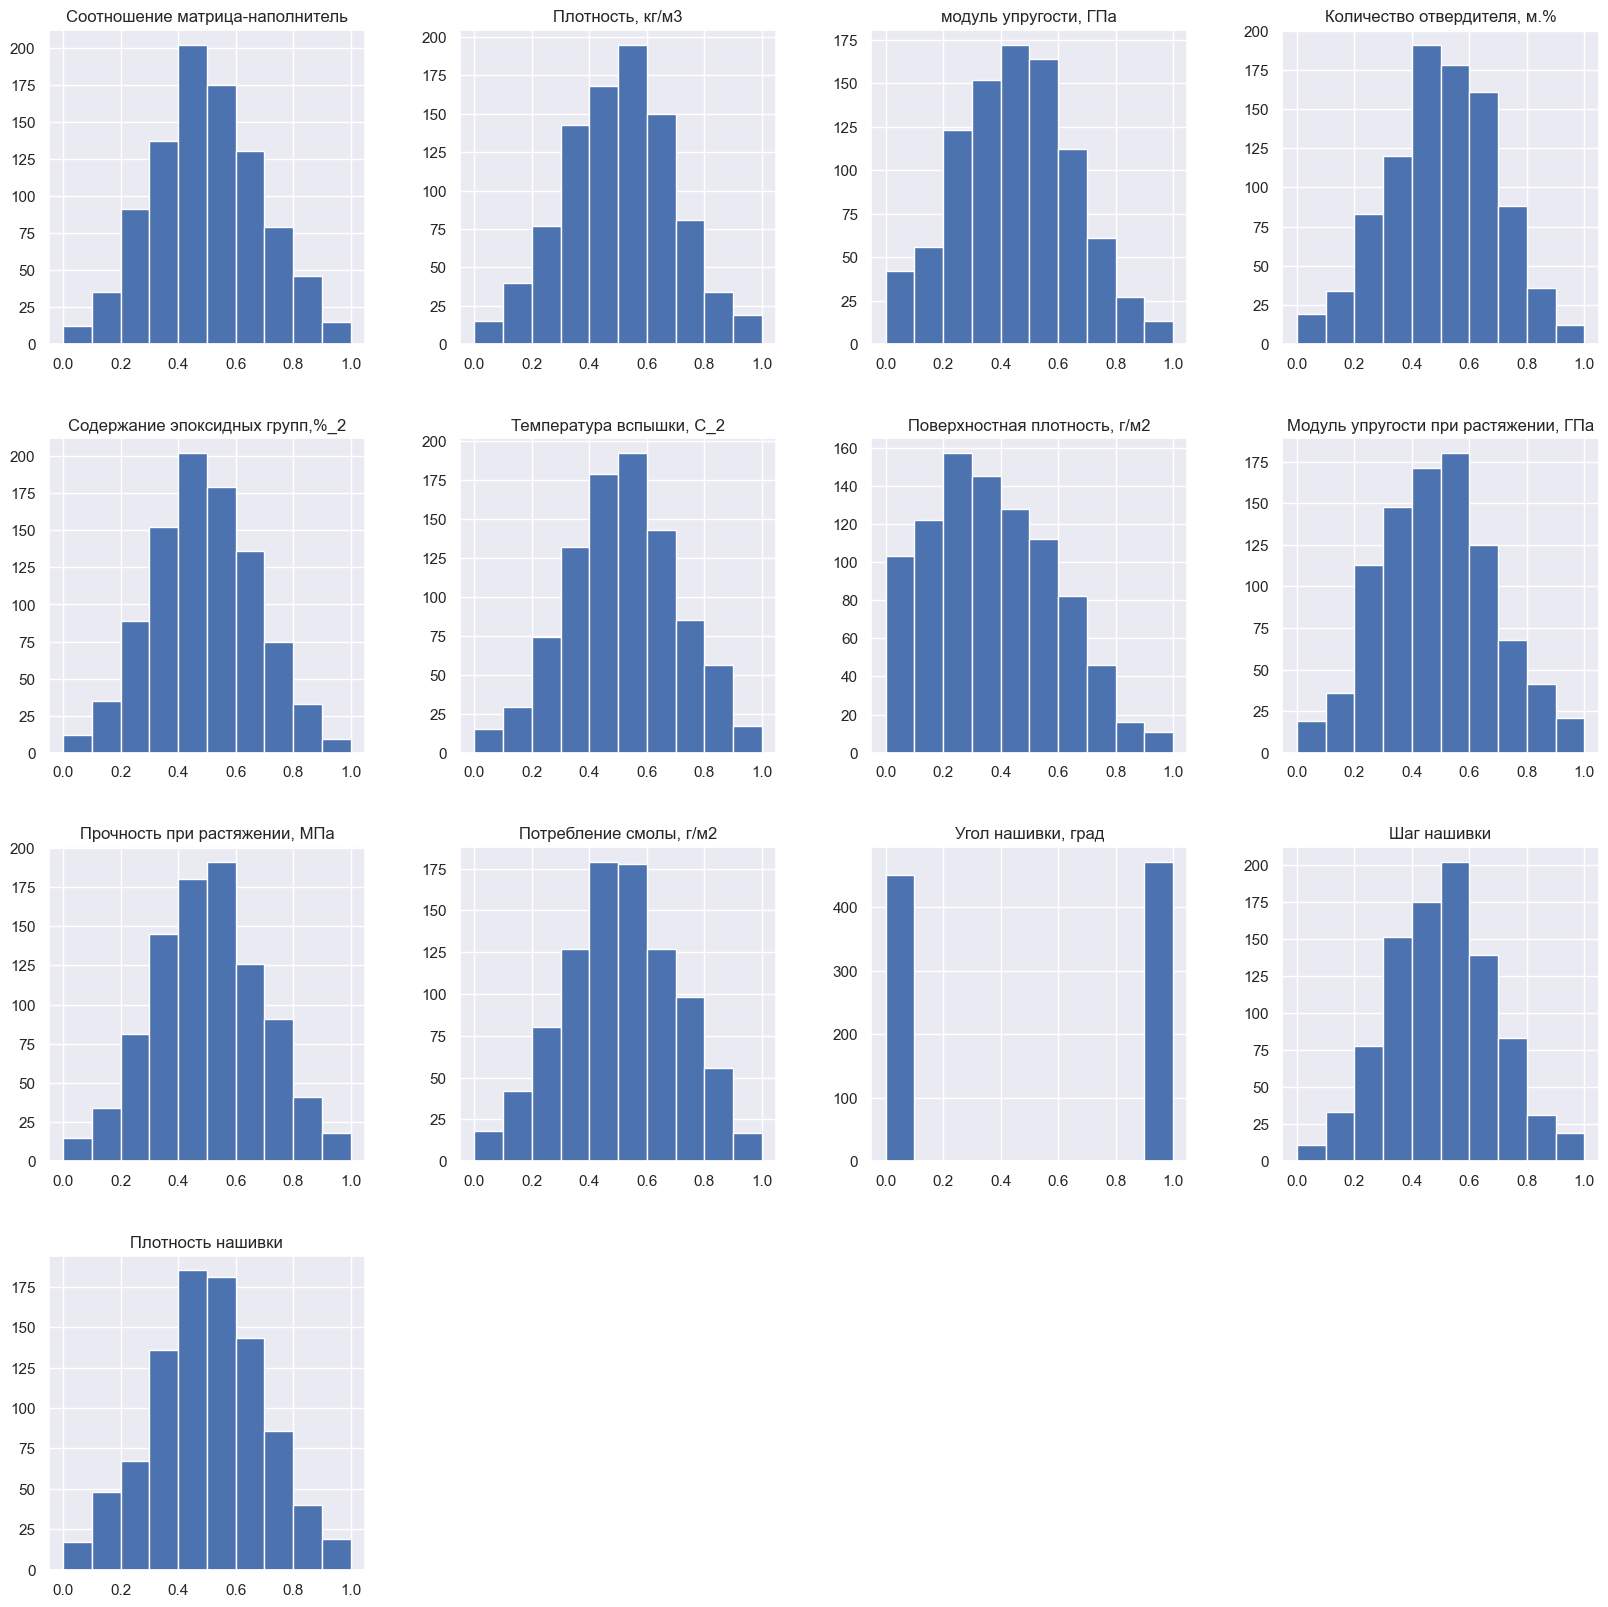

In [48]:
df_norm.hist(figsize = (20,20))
plt.show()

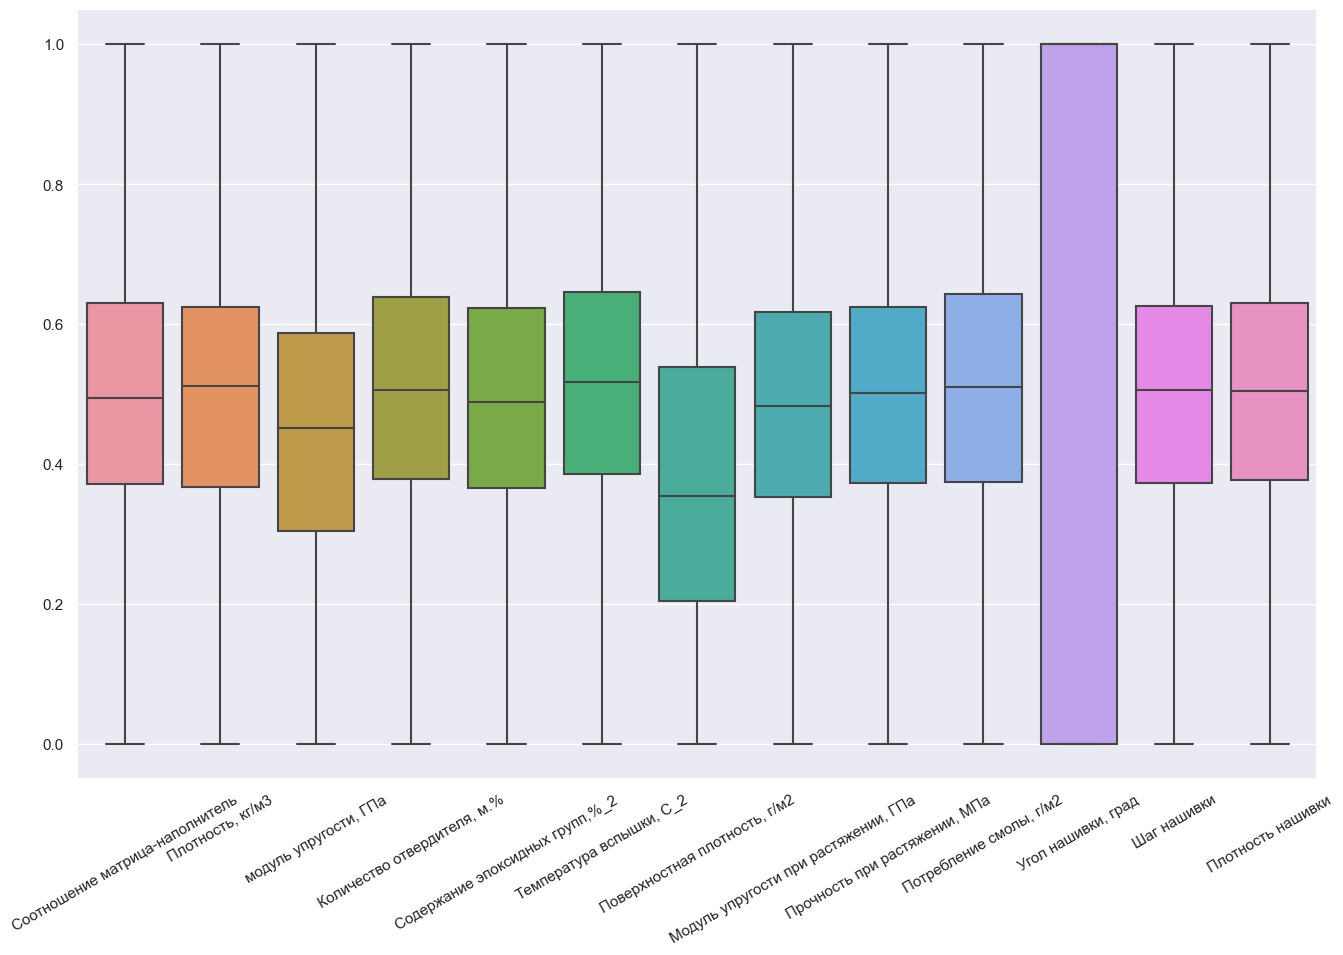

In [46]:
plt.figure(figsize = (16,10))
ax = sns.boxplot(data = df_norm)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

In [45]:
df_norm.to_csv('G:\\diploma\\data_norm.csv')